# TIME SERIES - ASSIGNMENT ON AUGMENTED DICKY FILLER TEST (ADF) - submitted by ABDHAHEER 

In [3]:
# Augmented dickey filler test (ADF) is the test used to find out whether series has a unit root or not
# Thereby rejecting the null hypothesis if series doen't have a unit root and accpeting alternate hypotheis
# it is important for a time series data to be in stationarity in order to perform model creation using Time series algorithm

## 1.Loading the dataset

In [1]:
# we downloaded this dataset in csv format from trading view for the Tatacoffee shares from 2013 to 2021
import pandas as pd
dataset=pd.read_csv("Tatacoffee13_21.csv", parse_dates=['Date'], index_col='Date')

In [2]:
dataset

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


## 2.Data pre-processing for the purpose of plotting the graph 

In [3]:
# the main reason for this pre-processing is that - in the share market data saturday and sunday datas are not available.
# it means there is a break in between the dates of the dataset
# in order to make it a continuous series we are doing this pre-processing 


#Start date and end_date

from datetime import date, timedelta
import pandas as pd
start_date = pd.to_datetime("2013-01-01")
end_date = pd.to_datetime("2019-02-04") - timedelta(days=1) #Excluding last

#List of all dates
all_date = pd.date_range(start_date, end_date, freq='d')

In [4]:
all_date

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03'],
              dtype='datetime64[ns]', length=2225, freq='D')

In [5]:
dummyDate=dataset

In [6]:
dummyDate.index=all_date

In [7]:
dummyDate

,Open,High,Low,Close
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-05,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2019-01-30,202.90,207.80,201.35,205.00
2019-01-31,206.00,206.85,202.05,202.95
2019-02-01,203.90,203.90,199.35,201.00
2019-02-02,200.00,222.00,196.00,218.35


In [8]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

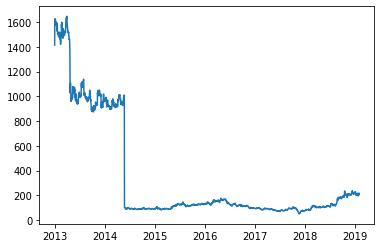

In [11]:
import matplotlib.pyplot as plt
plt.plot(dataset["Close"])

<Figure size 1152x360 with 0 Axes>

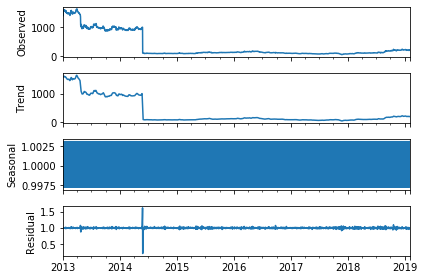

In [12]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='multiplicative')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

<Figure size 1152x360 with 0 Axes>

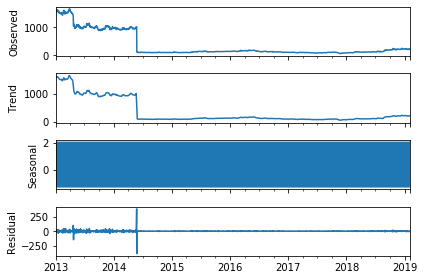

In [13]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='additive')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

## 3. ADF TEST

In [16]:
# Importing library statsmodel.tsa.statttools for time series 
# Statsmodels is a Python module that provides functions and classes for the estimation of many statistical models
# The function to perform ADF is called adfuller.

def adf_test(timeseries,df,Close):
    plt.figure(figsize=(16,5))
    # Plot the data
    
# ADF Test
    from statsmodels.tsa.stattools import adfuller
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
# Add  critical values    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    ans=dfoutput
    
    
# General condition of hypothesis testing 
    print("Condition:")
    print("p-value<=0.05-->Accept Alternate Hypothesis")
    print("p-value>0.05-->Accept Null Hypothesis")
    
    
# Checking conditions and deciding the datapoint are in stationarity or non- stationarity 
    if(ans['Test Statistic']<ans["Critical Value (1%)"] or ans['Test Statistic']<ans["Critical Value (5%)"] or ans['Test Statistic']<ans["Critical Value (10%)"] and ans["p-value"]<0.05):
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Reject null hypothesis:Non Stationarity")
        print("Accept Alternate hypothesis:Staionarity ")
        message="Stationarity based on ADF"
    else:
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Accept null hypothesis:Non Stationarity" )
        print("Reject Alternate hypothesis:Staionarity ")
        message="Non-stationarity based on ADF"
        
        
# Plotting the time series    
    plt.plot(df.index, df[Close], label = Close)
    plt.legend(loc='best')
    plt.title("{}_{}_2013 to 2021".format(message,Close))
    plt.savefig("{}_ADH.png".format(Close))
    plt.show()
    
    return message
    
# Call the function and run the test


Results of Dickey-Fuller Test:
Test Statistic                   -3.007236
p-value                           0.034224
#Lags Used                        1.000000
Number of Observations Used    2223.000000
Critical Value (1%)              -3.433295
Critical Value (5%)              -2.862841
Critical Value (10%)             -2.567463
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Reject null hypothesis:Non Stationarity
Accept Alternate hypothesis:Staionarity 


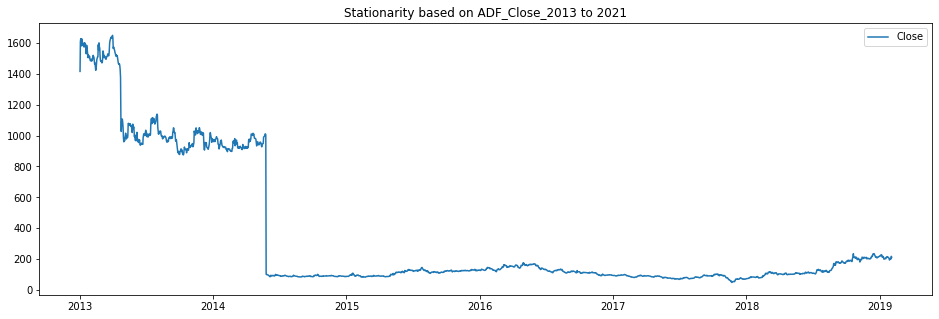

'Stationarity based on ADF'

In [17]:
adf_test(dataset["Close"],dataset,"Close")

Results of Dickey-Fuller Test:
Test Statistic                   -2.502734
p-value                           0.114810
#Lags Used                        1.000000
Number of Observations Used    2223.000000
Critical Value (1%)              -3.433295
Critical Value (5%)              -2.862841
Critical Value (10%)             -2.567463
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Accept null hypothesis:Non Stationarity
Reject Alternate hypothesis:Staionarity 


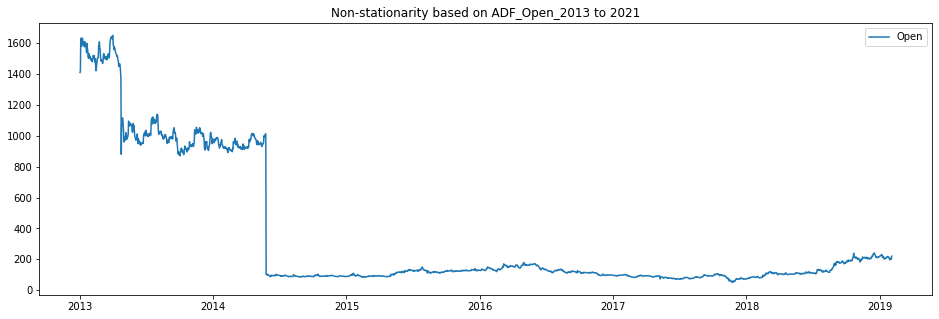

'Non-stationarity based on ADF'

In [18]:
adf_test(dataset["Open"],dataset,"Open")

Results of Dickey-Fuller Test:
Test Statistic                   -3.055296
p-value                           0.030043
#Lags Used                        2.000000
Number of Observations Used    2222.000000
Critical Value (1%)              -3.433296
Critical Value (5%)              -2.862842
Critical Value (10%)             -2.567463
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Reject null hypothesis:Non Stationarity
Accept Alternate hypothesis:Staionarity 


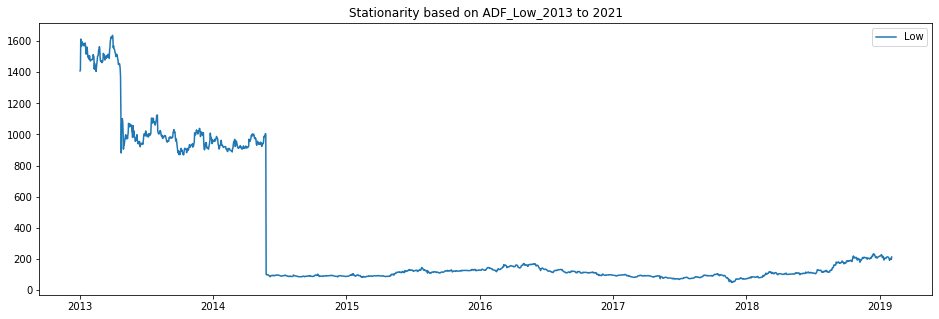

'Stationarity based on ADF'

In [20]:
adf_test(dataset["Low"],dataset,"Low")

Results of Dickey-Fuller Test:
Test Statistic                   -2.462481
p-value                           0.124872
#Lags Used                        0.000000
Number of Observations Used    2224.000000
Critical Value (1%)              -3.433294
Critical Value (5%)              -2.862840
Critical Value (10%)             -2.567462
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Accept null hypothesis:Non Stationarity
Reject Alternate hypothesis:Staionarity 


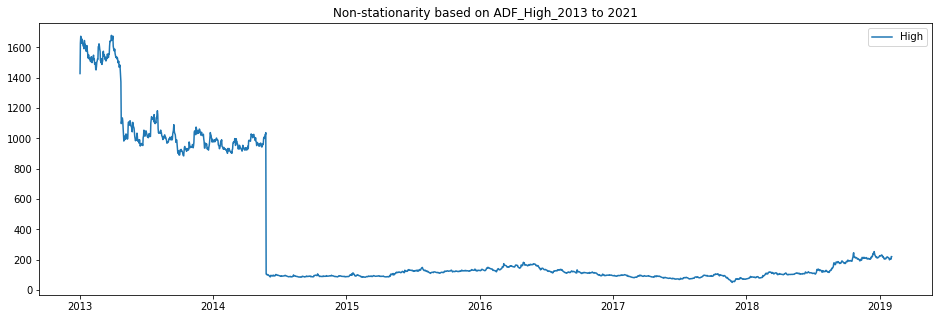

'Non-stationarity based on ADF'

In [21]:
adf_test(dataset["High"],dataset,"High")

## 4.Result infered from ADF TEST

In [2]:
# Conclusion
## --> From the above time series data - Close and Low are Stationarity based wheareas Open and High are non stationarity
## contd...                                                                                                    